<a href="https://colab.research.google.com/github/bidishaaiml/Flower-Classification/blob/main/flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from skimage.feature import local_binary_pattern
import numpy as np
from skimage.transform import resize
import seaborn as sns
import matplotlib.pyplot as plt

# Function to extract LBP features from an image
def extract_lbp_features(image):
    radius = 1
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp, bins=np.arange(0, n_points + 3), density=True)
    return hist

# Function to load and resize images from a directory
def load_images_from_folder(folder, target_size=(100, 100)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized = resize(img, target_size, anti_aliasing=True)
            images.append(img_resized)
    return images

# Directory paths containing images of different classes
class_folders = ["/content/Flowers/Train/daisy", "/content/Flowers/Train/dandelion", "/content/Flowers/Train/rose","/content/Flowers/Train/sunflower","/content/Flowers/Train/tulip"]
# Load images and assign labels
X = []
y = []
for i, folder in enumerate(class_folders):
    images = load_images_from_folder(folder)
    X.extend(images)
    y.extend([i] * len(images))

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Extract features
X_features = np.array([extract_lbp_features(image) for image in X])

# Preprocess the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Choose a machine learning algorithm (e.g., Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

matrix_labels=["daisy","dandelion","rose","sunflower","tulip"]

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.40326340326340326
Confusion Matrix:
[[22 24 10 11 12]
 [11 44 23 13 13]
 [13 16 21 10 13]
 [ 8  9 10 41 13]
 [ 9 14 10 14 45]]


Accuracy: 0.4522144522144522


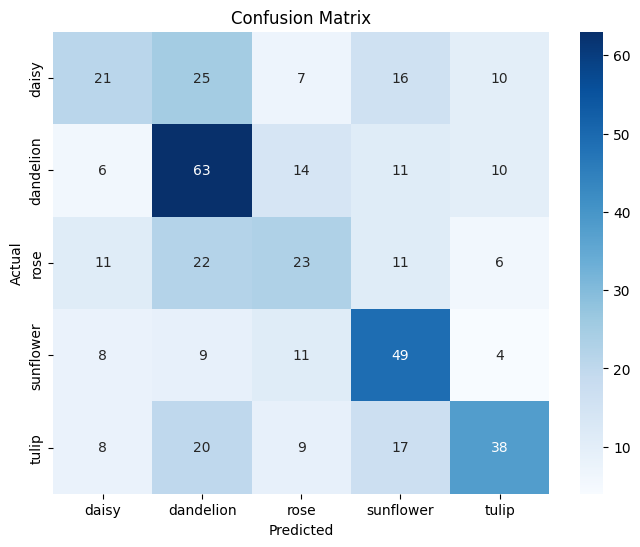

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from skimage.transform import resize

# Function to extract LBP features from an image
def extract_lbp_features(image):
    radius = 1
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp, bins=np.arange(0, n_points + 3), density=True)
    return hist

# Function to load and resize images from a directory
def load_images_from_folder(folder, target_size=(100, 100)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized = resize(img, target_size, anti_aliasing=True)
            images.append(img_resized)
    return images

# Directory paths containing images of different classes
class_folders = ["/content/Flowers/Train/daisy", "/content/Flowers/Train/dandelion", "/content/Flowers/Train/rose","/content/Flowers/Train/sunflower","/content/Flowers/Train/tulip"]

# Load images and assign labels
X = []
y = []
for i, folder in enumerate(class_folders):
    images = load_images_from_folder(folder)
    X.extend(images)
    y.extend([i] * len(images))

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Extract features
X_features = np.array([extract_lbp_features(image) for image in X])

# Preprocess the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Instantiate SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Predict the labels for test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
matrix_labels=["daisy","dandelion","rose","sunflower","tulip"]
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=matrix_labels, yticklabels=matrix_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
